In [1]:
## Import modules

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from scipy import stats

In [2]:
## Import data

## phenotypes matrices

dmso2_phenotypes = pd.read_excel('',index_col = 0)
etop_phenotypes = pd.read_excel('',index_col = 0)
keto_phenotypes = pd.read_excel('',index_col = 0)


## singles phenotypes

dmso2_singles = pd.read_excel('',index_col = 0)
etop_singles = pd.read_excel('',index_col = 0)
keto_singles = pd.read_excel('',index_col = 0)


## singles table
singles_table = pd.read_excel('/Users/benh/Desktop/UCSF_Tetrad_Program/Gilbert_Lab/gi2/results/dmso/gi2_dmso_singletable.xlsx',index_col = 0)

dmso2_phenotypes = dmso_phenotypes.fillna(0)
etop_phenotypes = etop_phenotypes.fillna(0)
keto_phenotypes = keto_phenotypes.fillna(0)

dmso2_singles = dmso_singles.fillna(0)
etop_singles = etop_singles.fillna(0)
keto_singles = keto_singles.fillna(0)


In [3]:
## Define functions for GI calling from Max's GIs analysis notebook

def getXYB(sgRNA, singlePhenotypes, phenotypeMatrix, variablePosition, fixedPosition, returnXerr=False):
    if not returnXerr:
        return singlePhenotypes[variablePosition+'.mean'], \
            phenotypeMatrix.loc[sgRNA,:] if fixedPosition == 'a' else phenotypeMatrix.loc[:,sgRNA], \
            singlePhenotypes.loc[sgRNA, fixedPosition +'.mean']
    else:
        return singlePhenotypes[variablePosition+'.mean'], \
            phenotypeMatrix.loc[sgRNA,:] if fixedPosition == 'a' else phenotypeMatrix.loc[:,sgRNA], \
            singlePhenotypes.loc[sgRNA, fixedPosition +'.mean'], singlePhenotypes[variablePosition+'.std']
    
def quadFitForceIntercept(xdata, ydata, bdata):
    m1 = optimize.fmin(lambda m, x, y: ((m[0]*(x**2) + m[1]*x + bdata - y)**2).sum(), x0=[0.1,0.1], args=(xdata, ydata), disp=0)
    return lambda x1: m1[0]*(np.array(x1)**2) + m1[1]*np.array(x1) + bdata
def linearFitForceIntercept(xdata, ydata, bdata):
    m1 = optimize.fmin(lambda m, x, y: ((m*x + bdata - y)**2).sum(), x0=0.1, args=(xdata, ydata), disp=0)[0]
    return lambda x1: m1*np.array(x1) + bdata


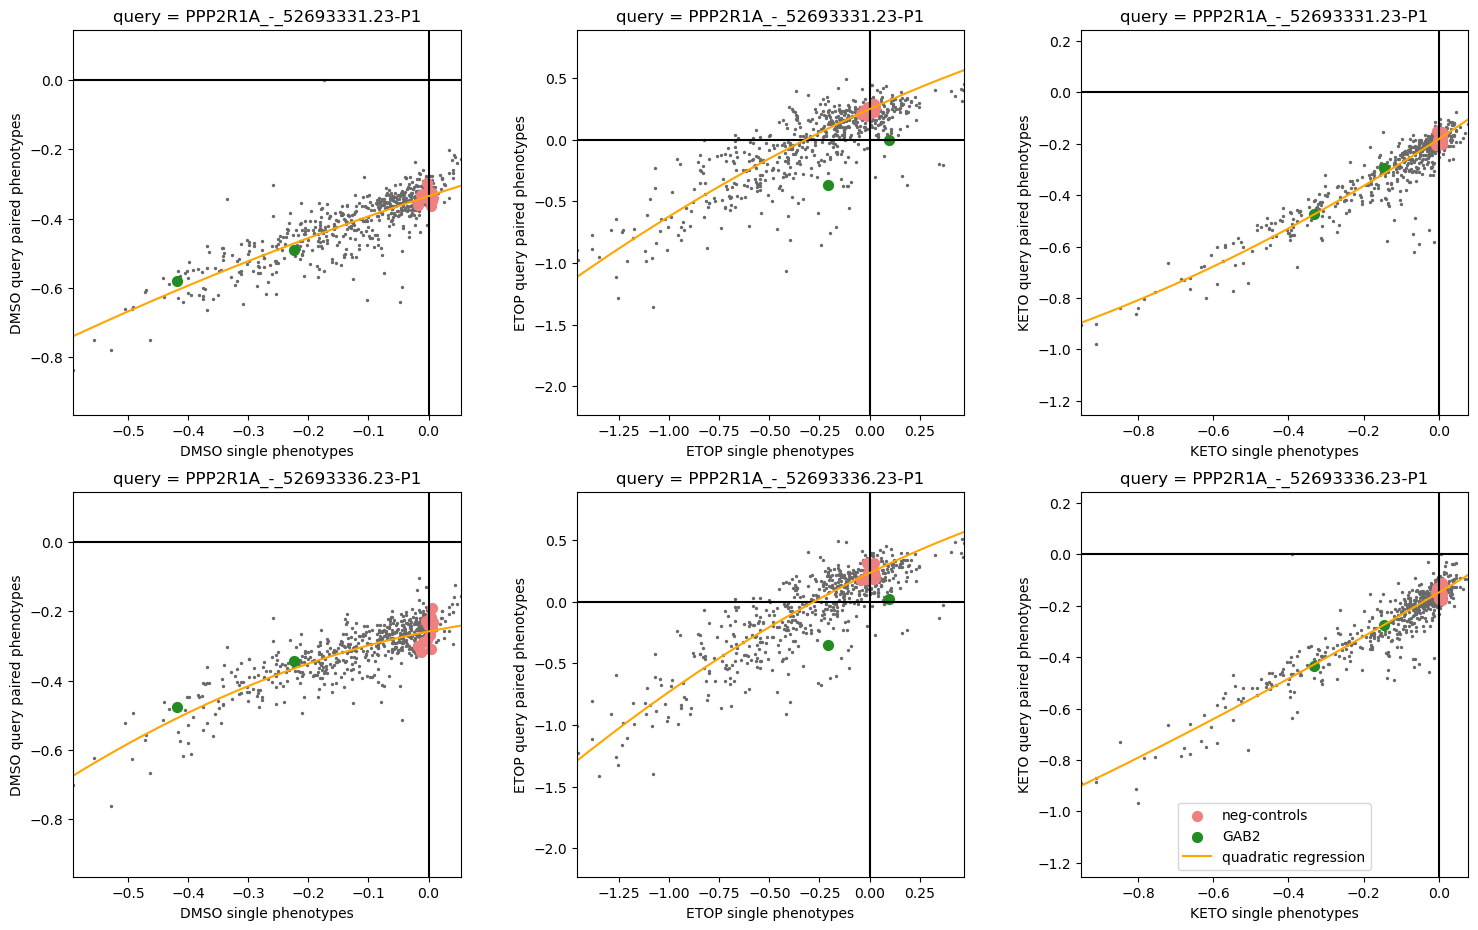

In [5]:
## set the query guide(s)
query_gene = 'PPP2R1A'
query1,query2 = singles_table.loc[singles_table['gene'] == query_gene].index
active_query2 = 'GAB2'


## For a given gene, plot it's paired phenotypes against every single phenotype

fit = quadFitForceIntercept

plt.figure(figsize=(18,11))
numPlots = matplotlib.gridspec.GridSpec(2,3,wspace=0.3)


## Plot the DMSO map fit
active = plt.subplot(numPlots[0,0])

xdata1,ydata1,bdata1 = getXYB(query1,dmso_singles,dmso_phenotypes,'b','a')
active.scatter(xdata1,ydata1,s=2,c='dimgray')
active.scatter(xdata1.loc[singles_table['gene'] == 'non-targeting'],ydata1.loc[singles_table['gene'] == 'non-targeting'],s=50,c='lightcoral',label = 'neg-controls')

active.scatter(xdata1.loc[singles_table.loc[singles_table['gene'] == active_query2].index], ydata1.loc[singles_table.loc[singles_table['gene'] == active_query2].index],s=50,color = 'forestgreen',label = active_query2)

active.plot((0,0),(np.hstack(dmso_phenotypes.values).min(),np.hstack(dmso_phenotypes.values).max()),color='black')
active.plot((dmso_singles['b.mean'].min(),dmso_singles['b.mean'].max()),(0,0),color='black')
fit1 = fit(xdata1,ydata1,bdata1)
quadFit = active.plot(np.arange(xdata1.min()-0.05,xdata1.max()+0.05,0.01),fit1(np.arange(xdata1.min()-0.05,xdata1.max()+0.05,0.01)),c='orange',label = 'quadratic regression')
plt.xlim(dmso_singles['b.mean'].min(),dmso_singles['b.mean'].max())
plt.ylim((np.hstack(dmso_phenotypes.values).min(),np.hstack(dmso_phenotypes.values).max()))
plt.xlabel('DMSO single phenotypes')
plt.ylabel('DMSO query paired phenotypes')
plt.title('query = '+query1)


## Plot the DMSO map fit 2
active = plt.subplot(numPlots[1,0])

xdata1,ydata1,bdata1 = getXYB(query2,dmso_singles,dmso_phenotypes,'b','a')
active.scatter(xdata1,ydata1,s=2,c='dimgray')
active.scatter(xdata1.loc[singles_table['gene'] == 'non-targeting'],ydata1.loc[singles_table['gene'] == 'non-targeting'],s=50,c='lightcoral',label = 'neg-controls')

active.scatter(xdata1.loc[singles_table.loc[singles_table['gene'] == active_query2].index], ydata1.loc[singles_table.loc[singles_table['gene'] == active_query2].index],s=50,color = 'forestgreen',label = active_query2)

active.plot((0,0),(np.hstack(dmso_phenotypes.values).min(),np.hstack(dmso_phenotypes.values).max()),color='black')
active.plot((dmso_singles['b.mean'].min(),dmso_singles['b.mean'].max()),(0,0),color='black')
fit1 = fit(xdata1,ydata1,bdata1)
quadFit = active.plot(np.arange(xdata1.min()-0.05,xdata1.max()+0.05,0.01),fit1(np.arange(xdata1.min()-0.05,xdata1.max()+0.05,0.01)),c='orange',label = 'quadratic regression')
plt.xlim(dmso_singles['b.mean'].min(),dmso_singles['b.mean'].max())
plt.ylim((np.hstack(dmso_phenotypes.values).min(),np.hstack(dmso_phenotypes.values).max()))
plt.xlabel('DMSO single phenotypes')
plt.ylabel('DMSO query paired phenotypes')
plt.title('query = '+query2)


## Plot the ETOP map fit
active = plt.subplot(numPlots[0,1])

xdata1,ydata1,bdata1 = getXYB(query1,etop_singles,etop_phenotypes,'b','a')
active.scatter(xdata1,ydata1,s=2,c='dimgray')
active.scatter(xdata1.loc[singles_table['gene'] == 'non-targeting'],ydata1.loc[singles_table['gene'] == 'non-targeting'],s=50,c='lightcoral',label = 'neg-controls')
active.scatter(xdata1.loc[singles_table.loc[singles_table['gene'] == active_query2].index], ydata1.loc[singles_table.loc[singles_table['gene'] == active_query2].index],s=50,color = 'forestgreen',label = active_query2)

active.plot((0,0),(np.hstack(etop_phenotypes.values).min(),np.hstack(etop_phenotypes.values).max()),color='black')
active.plot((etop_singles['b.mean'].min(),etop_singles['b.mean'].max()),(0,0),color='black')
fit1 = fit(xdata1,ydata1,bdata1)
quadFit = active.plot(np.arange(xdata1.min()-0.05,xdata1.max()+0.05,0.01),fit1(np.arange(xdata1.min()-0.05,xdata1.max()+0.05,0.01)),c='orange',label = 'quadratic regression')
plt.xlim(etop_singles['b.mean'].min(),etop_singles['b.mean'].max())
plt.ylim((np.hstack(etop_phenotypes.values).min(),np.hstack(etop_phenotypes.values).max()))
plt.xlabel('ETOP single phenotypes')
plt.ylabel('ETOP query paired phenotypes')
plt.title('query = '+query1)


## Plot the ETOP map fit2
active = plt.subplot(numPlots[1,1])

xdata1,ydata1,bdata1 = getXYB(query2,etop_singles,etop_phenotypes,'b','a')
active.scatter(xdata1,ydata1,s=2,c='dimgray')
active.scatter(xdata1.loc[singles_table['gene'] == 'non-targeting'],ydata1.loc[singles_table['gene'] == 'non-targeting'],s=50,c='lightcoral',label = 'neg-controls')
active.scatter(xdata1.loc[singles_table.loc[singles_table['gene'] == active_query2].index], ydata1.loc[singles_table.loc[singles_table['gene'] == active_query2].index],s=50,color = 'forestgreen',label = active_query2)

active.plot((0,0),(np.hstack(etop_phenotypes.values).min(),np.hstack(etop_phenotypes.values).max()),color='black')
active.plot((etop_singles['b.mean'].min(),etop_singles['b.mean'].max()),(0,0),color='black')
fit1 = fit(xdata1,ydata1,bdata1)
quadFit = active.plot(np.arange(xdata1.min()-0.05,xdata1.max()+0.05,0.01),fit1(np.arange(xdata1.min()-0.05,xdata1.max()+0.05,0.01)),c='orange',label = 'quadratic regression')
plt.xlim(etop_singles['b.mean'].min(),etop_singles['b.mean'].max())
plt.ylim((np.hstack(etop_phenotypes.values).min(),np.hstack(etop_phenotypes.values).max()))
plt.xlabel('ETOP single phenotypes')
plt.ylabel('ETOP query paired phenotypes')
plt.title('query = '+query2)


## Plot the KETO map fit
active = plt.subplot(numPlots[0,2])

xdata1,ydata1,bdata1 = getXYB(query1,keto_singles,keto_phenotypes,'b','a')
active.scatter(xdata1,ydata1,s=2,c='dimgray')
active.scatter(xdata1.loc[singles_table['gene'] == 'non-targeting'],ydata1.loc[singles_table['gene'] == 'non-targeting'],s=50,c='lightcoral',label = 'neg-controls')
active.scatter(xdata1.loc[singles_table.loc[singles_table['gene'] == active_query2].index], ydata1.loc[singles_table.loc[singles_table['gene'] == active_query2].index],s=50,color = 'forestgreen',label = active_query2)

active.plot((0,0),(np.hstack(keto_phenotypes.values).min(),np.hstack(keto_phenotypes.values).max()),color='black')
active.plot((keto_singles['b.mean'].min(),keto_singles['b.mean'].max()),(0,0),color='black')
fit1 = fit(xdata1,ydata1,bdata1)
quadFit = active.plot(np.arange(xdata1.min()-0.05,xdata1.max()+0.05,0.01),fit1(np.arange(xdata1.min()-0.05,xdata1.max()+0.05,0.01)),c='orange',label = 'quadratic regression')
plt.xlim(keto_singles['b.mean'].min(),keto_singles['b.mean'].max())
plt.ylim((np.hstack(keto_phenotypes.values).min(),np.hstack(keto_phenotypes.values).max()))
plt.xlabel('KETO single phenotypes')
plt.ylabel('KETO query paired phenotypes')
plt.title('query = '+query1)

## Plot the KETO map fit2
active = plt.subplot(numPlots[1,2])

xdata1,ydata1,bdata1 = getXYB(query2,keto_singles,keto_phenotypes,'b','a')
active.scatter(xdata1,ydata1,s=2,c='dimgray')
active.scatter(xdata1.loc[singles_table['gene'] == 'non-targeting'],ydata1.loc[singles_table['gene'] == 'non-targeting'],s=50,c='lightcoral',label = 'neg-controls')
active.scatter(xdata1.loc[singles_table.loc[singles_table['gene'] == active_query2].index], ydata1.loc[singles_table.loc[singles_table['gene'] == active_query2].index],s=50,color = 'forestgreen',label = active_query2)

active.plot((0,0),(np.hstack(keto_phenotypes.values).min(),np.hstack(keto_phenotypes.values).max()),color='black')
active.plot((keto_singles['b.mean'].min(),keto_singles['b.mean'].max()),(0,0),color='black')
fit1 = fit(xdata1,ydata1,bdata1)
quadFit = active.plot(np.arange(xdata1.min()-0.05,xdata1.max()+0.05,0.01),fit1(np.arange(xdata1.min()-0.05,xdata1.max()+0.05,0.01)),c='orange',label = 'quadratic regression')
plt.xlim(keto_singles['b.mean'].min(),keto_singles['b.mean'].max())
plt.ylim((np.hstack(keto_phenotypes.values).min(),np.hstack(keto_phenotypes.values).max()))
plt.xlabel('KETO single phenotypes')
plt.ylabel('KETO query paired phenotypes')
plt.title('query = '+query2)
plt.legend()
#plt.savefig('/Users/benh/Desktop/fit_ndufa.png',dpi=300)
